In [1]:
from Preprocessing import *
import os

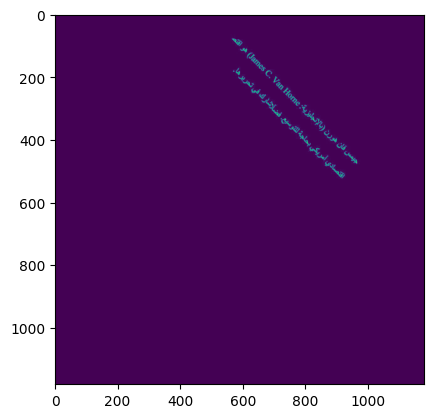

In [2]:
img=cv2.imread('../Dataset/Marhey/0.jpeg',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

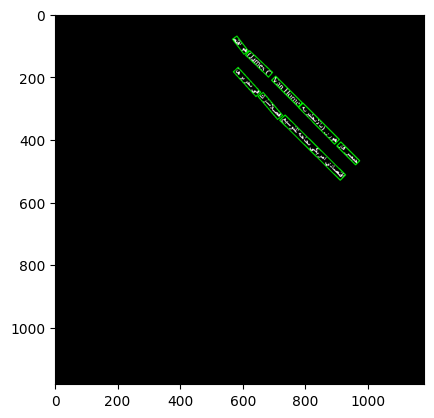

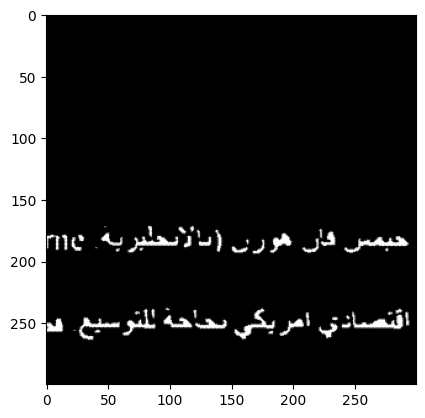

In [3]:
preprocessor = Preprocessing(img)
processed_image = preprocessor.preprocess_image(display_rectangles=True)
plt.imshow(processed_image, cmap='gray')

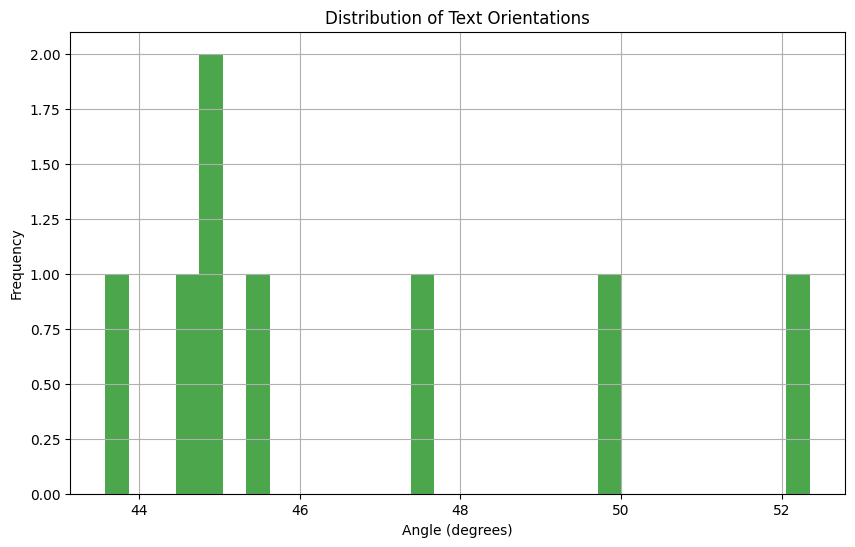

In [4]:
preprocessor.plot_angles_histogram()

In [5]:
# Directories setup
src_dir = "../Dataset"
dst_dir = "../Preprocessed Dataset"

# Ensure the destination directory exists
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

# Process each image
for folder in os.listdir(src_dir):
    folder_path = os.path.join(src_dir, folder)
    save_path = os.path.join(dst_dir, folder)
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            processor = Preprocessing(img)
            processed_img = processor.preprocess_image()
            save_img_path = os.path.join(save_path, file)
            print(save_img_path)
            cv2.imwrite(save_img_path, processed_img)
        else:
            print(f"Failed to read image: {img_path}")

../Preprocessed Dataset\IBM Plex Sans Arabic\0.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\1.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\10.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\100.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\101.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\102.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\103.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\104.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\105.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\106.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\107.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\108.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\109.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\11.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\110.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\111.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\112.jpeg
../Preprocessed Dataset\IBM Plex Sans Arabic\113.jpeg
../Preprocessed Dataset\IBM Plex S